In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import models
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

2023-10-02 23:35:03.155294: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-02 23:35:05.165220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 30s 3us/step


In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [4]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [5]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10, batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 26s - loss: 0.2361 - accuracy: 0.9264 - val_loss: 0.0579 - val_accuracy: 0.9832 - 26s/epoch - 62ms/step
Epoch 2/10
422/422 - 26s - loss: 0.0834 - accuracy: 0.9727 - val_loss: 0.0413 - val_accuracy: 0.9890 - 26s/epoch - 62ms/step
Epoch 3/10
422/422 - 26s - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0340 - val_accuracy: 0.9895 - 26s/epoch - 62ms/step
Epoch 4/10
422/422 - 29s - loss: 0.0492 - accuracy: 0.9839 - val_loss: 0.0270 - val_accuracy: 0.9918 - 29s/epoch - 69ms/step
Epoch 5/10
422/422 - 24s - loss: 0.0418 - accuracy: 0.9861 - val_loss: 0.0295 - val_accuracy: 0.9920 - 24s/epoch - 56ms/step
Epoch 6/10
422/422 - 26s - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0269 - val_accuracy: 0.9927 - 26s/epoch - 61ms/step
Epoch 7/10
422/422 - 22s - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0227 - val_accuracy: 0.9937 - 22s/epoch - 53ms/step
Epoch 8/10
422/422 - 24s - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0267 - val_accuracy: 0.9928 - 24s/epoch - 58ms/step


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0252 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


1/1 [==============================] - 0s 62ms/step
Predicted Label: 6
Actual Label: 6


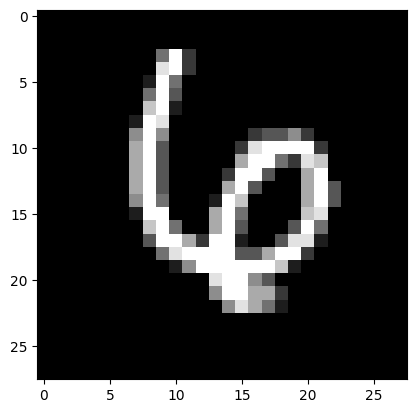

In [19]:
import numpy as np
image_index=22
image = np.reshape(test_images[image_index], (1, 28, 28, 1))

predictions = model.predict(image)
predicted_label = np.argmax(predictions)

actual_label = np.argmax(test_labels[image_index])

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

import matplotlib.pyplot as plt

plt.imshow(np.squeeze(test_images[image_index]), cmap='gray')
plt.show()
